In [26]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [28]:
base = automap_base()
base.prepare(engine)
base.classes.keys()

[]

In [20]:
Measurement = base.classes.Measurement
station = base.classes.station
session = session(engine)

AttributeError: Measurement

In [13]:
year = dt.date.today() - dt.timedelta(days=365)
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year).all()
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
df.sort_values("date")
df.plot(x_compat=True)
plt.xticks(rotation='40')

NameError: name 'session' is not defined

In [18]:
df.describe()

NameError: name 'df' is not defined

In [19]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

NameError: name 'session' is not defined

In [21]:
import datetime as dt
from pandas.plotting import table
prev_year = dt.date.today() - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

NameError: name 'session' is not defined

In [22]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [23]:
import datetime as dt
prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)
tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

NameError: name 'session' is not defined

<IPython.core.display.Javascript object>


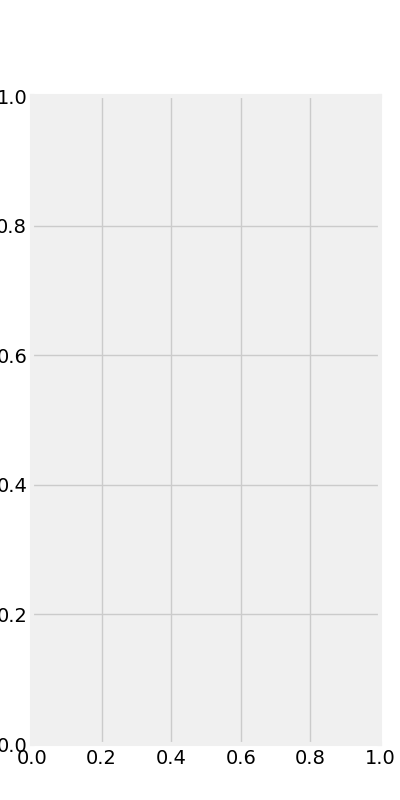

NameError: name 'tmax' is not defined

In [24]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
fig.tight_layout()
fig.show()

In [25]:
start_date = '2012-03-01'
end_date = '2012-03-14'
sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

NameError: name 'Station' is not defined